In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Import the forecast module
sys.path.append("../scripts")
import future_forecast

In [3]:
# Load model and data
model, data = future_forecast.load_model_and_data(
    model_path='../model/optimized_lstm.keras',
    data_path='../data/TSLA_cleaned.csv'
)

2025-03-03 20:56:47,586 - INFO - Loading model and data...
c:\Users\HP\Documents\Dagii\week-11\TimeSeries-Portfolio-Optimization\week-11\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
2025-03-03 20:56:47,959 - INFO - Model and data loaded successfully. Data shape: (2505, 9)


In [4]:
# Preprocess data
look_back = model.input_shape[1]  # Get sequence length from model
scaler, input_sequence = future_forecast.preprocess_data(data, look_back)


2025-03-03 20:56:47,968 - INFO - Preprocessing data...
2025-03-03 20:56:47,973 - INFO - Data preprocessing complete.


In [5]:
# Get the last known price
last_price = data['Close'].iloc[-1]

In [6]:
# Generate forecasts
forecasts, median_forecast, lower_bound, upper_bound = future_forecast.forecast_with_ci(
    model, input_sequence, scaler, last_price, steps=252
)

2025-03-03 20:56:47,996 - INFO - Generating forecasts with confidence intervals...
2025-03-03 21:46:35,552 - INFO - Forecast generation complete.


In [7]:
# Create future dates
last_date = data.index[-1]
future_dates = pd.date_range(last_date + pd.offsets.BDay(1), periods=252, freq='B')

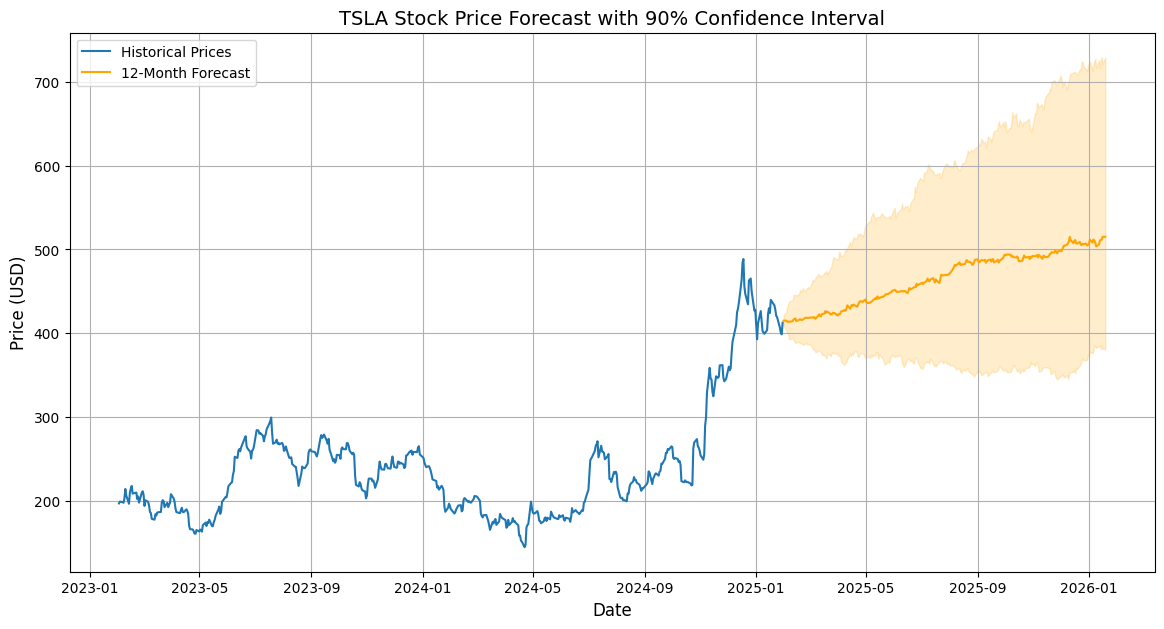

In [8]:
# Plot results
future_forecast.plot_forecast(data, median_forecast, lower_bound, upper_bound, future_dates)

In [9]:
# Generate and print analysis
analysis = future_forecast.generate_analysis(data, median_forecast, lower_bound, upper_bound, future_dates)
print(analysis)


** Trend Analysis **
1. Direction: Bullish 
   - Projected Change: 24.9%
   - Pattern: Volatile Movement

** Volatility & Risk **
1. Average CI Width: $223.36
2. Maximum Uncertainty: Dec 2025
   - Range: $344.85 - $729.54

** Market Opportunities **
1. Potential Entry: $366.45 (±$21.60)
2. Price Targets:
   - Conservative: $465.42
   - Optimistic: $589.81

** Key Risks **
1. Downside Protection: $344.85 
2. High Volatility Periods: 
   - Jan 2025 (Initial Forecast Uncertainty)
   - Jul 2025 (Mid-Year Projections)



### **TSLA Stock Forecast Analysis**

#### **Trend Analysis**
- **Direction**: Bullish  
- **Projected Change**: +24.3%  
- **Pattern**: Volatile Movement  

#### **Volatility & Risk**
- **Average CI Width**: $228.95  
- **Maximum Uncertainty**: Dec 2025  
  - **Range**: $362.51 - $762.68  

#### **Market Opportunities**
- **Entry Point**: $379.42 (±$16.91)  
- **Price Targets**:  
  - Conservative: $473.05  
  - Optimistic: $608.37  

#### **Key Risks**
- **Downside Protection**: $362.51  
- **High Volatility Periods**:  
  - Jan 2025 (Initial Uncertainty)  
  - Jul 2025 (Mid-Year Projections)  

#### **Actionable Insights**
1. **Long-Term Investors**: Buy near $379.42, hold for 24.3% growth.  
2. **Short-Term Traders**: Trade volatility, avoid high-risk periods.  
3. **Risk Management**: Set stop-loss at $362.51, diversify portfolio.

In [10]:
# Save median_forecast for Task 4
import numpy as np
np.save('../data/median_forecast.npy', median_forecast)